In [ ]:
!pip install pandas

In [ ]:
# import libraries
import pandas as pd
import io

# mount google drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sounding_Spirit/dimension_data_seperate.csv')
df.head()

,FILENAME ID,HEIGHT,WIDTH
0,xxxx-Worldf-MTS,27.5,20.0
1,1925-Comple-MTS,20.0,13.5
2,1923-NewHar-MTS,17.5,24.0
3,1923-Eightn-MTS,30.5,24.0
4,1923-Christ-MTS,26.5,18.0


In [ ]:
df

,FILENAME ID,HEIGHT,WIDTH
0,xxxx-Worldf-MTS,27.5,20.0
1,1925-Comple-MTS,20.0,13.5
2,1923-NewHar-MTS,17.5,24.0
3,1923-Eightn-MTS,30.5,24.0
4,1923-Christ-MTS,26.5,18.0
...,...,...,...
937,19xx-Americ-EMU,25.0,17.5
938,19xx-Americ-EMU,24.5,17.0
939,19xx-Gospel-EMU,19.5,13.5
940,19xx-Gospel-EMU,20.0,13.5


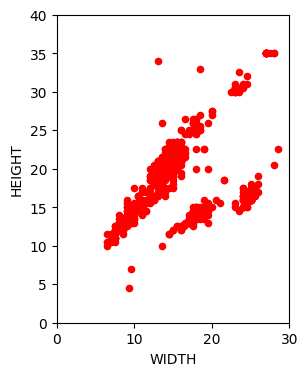

In [ ]:
df.plot(figsize=(3, 4), xlim=(0,30),ylim=(0, 40),kind='scatter',x = 'WIDTH', y = 'HEIGHT', c = 'red');

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


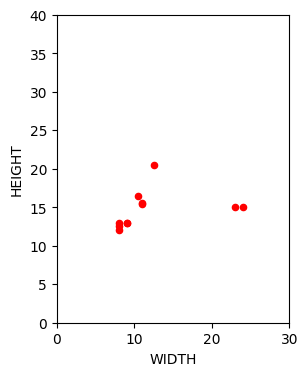

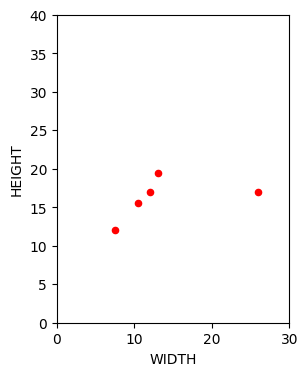

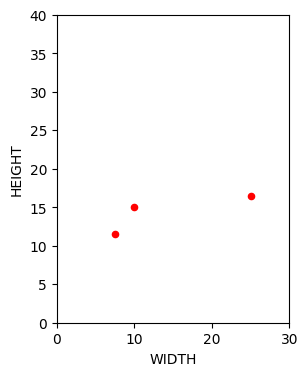

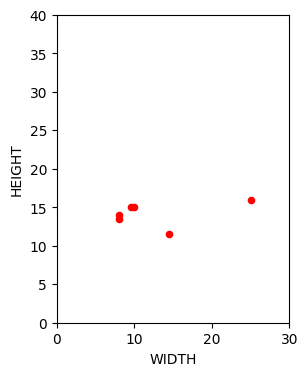

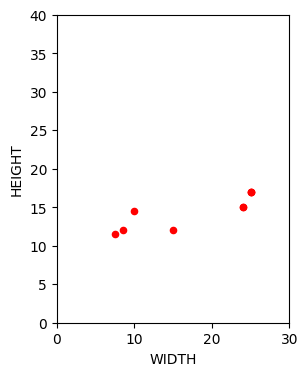

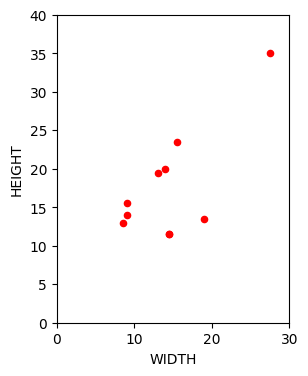

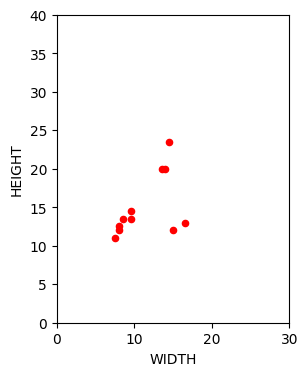

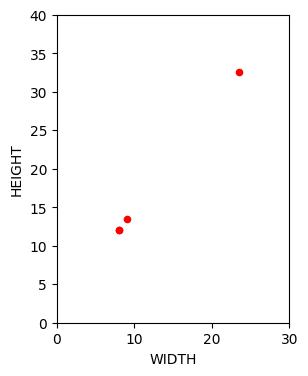

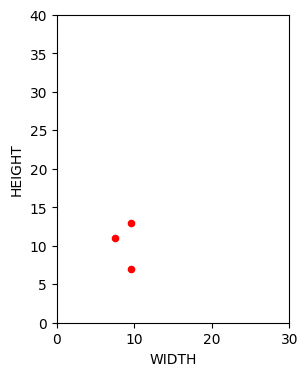

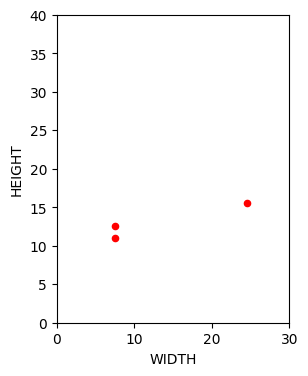

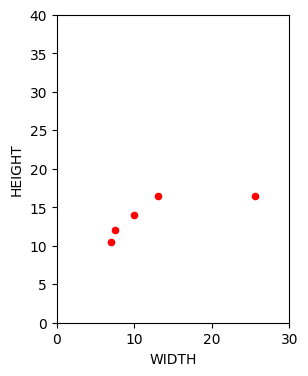

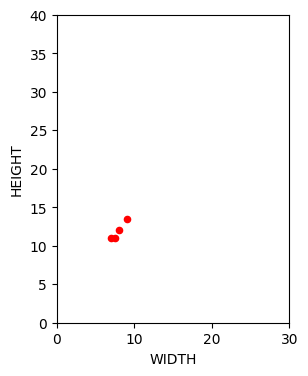

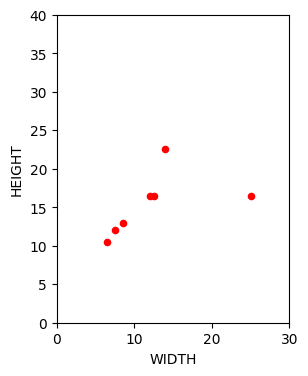

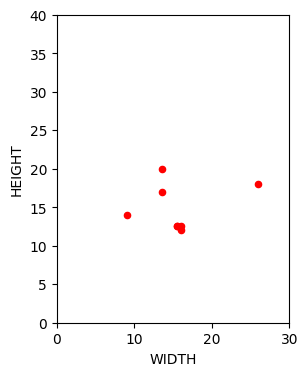

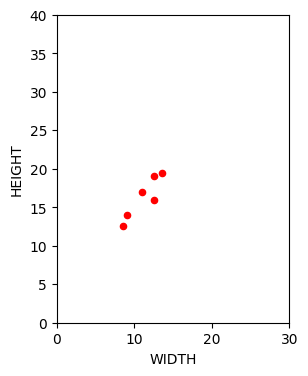

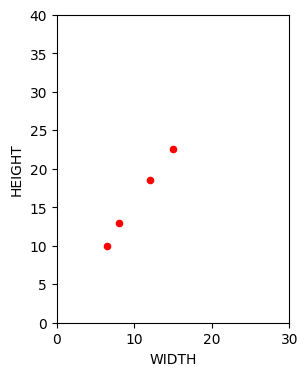

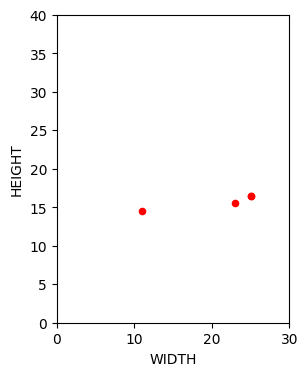

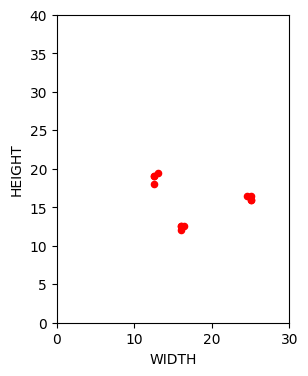

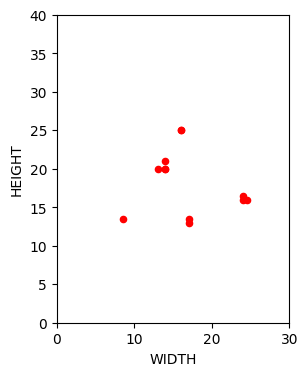

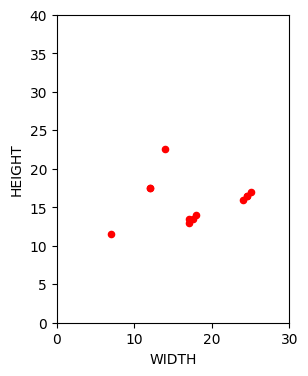

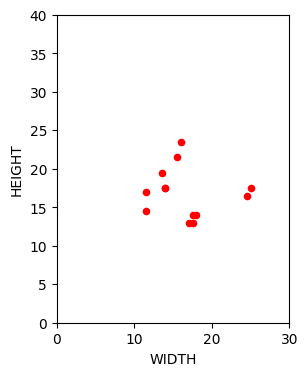

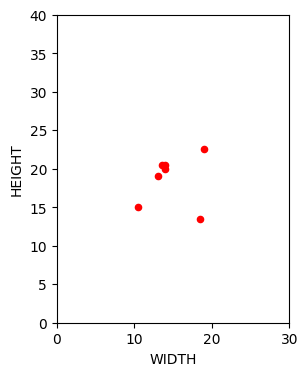

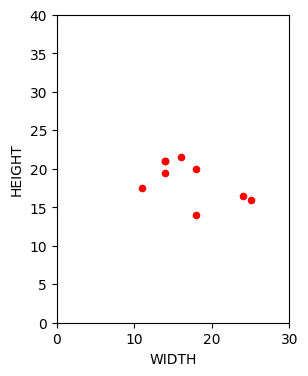

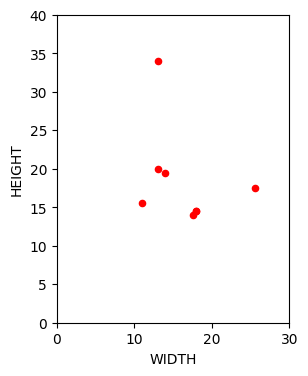

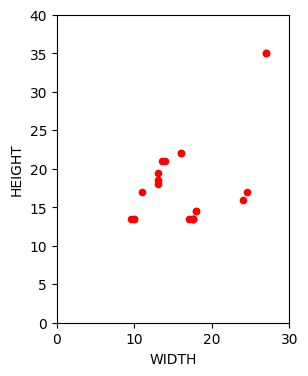

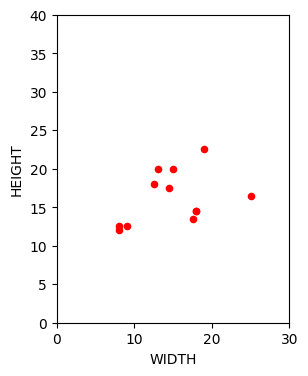

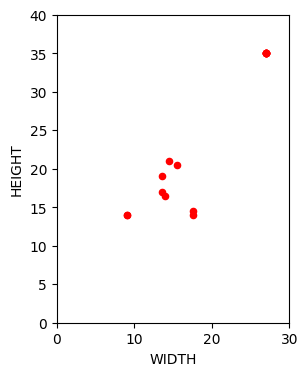

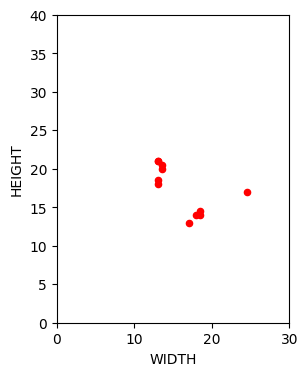

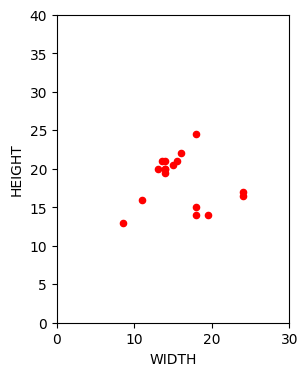

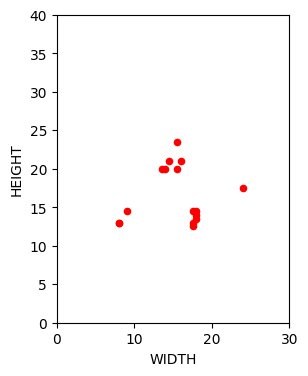

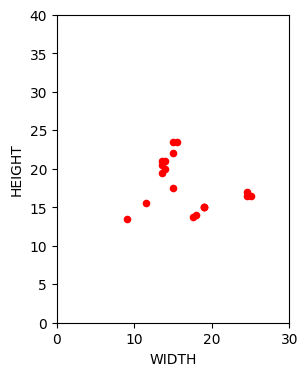

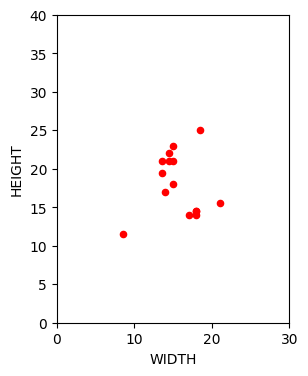

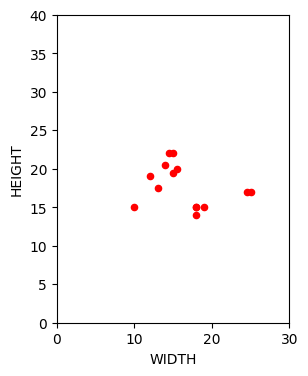

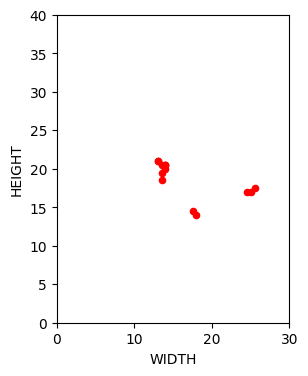

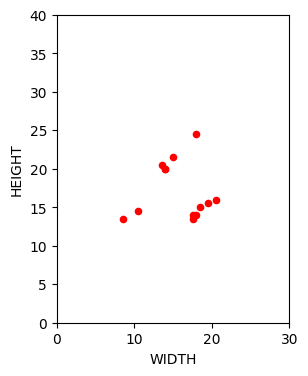

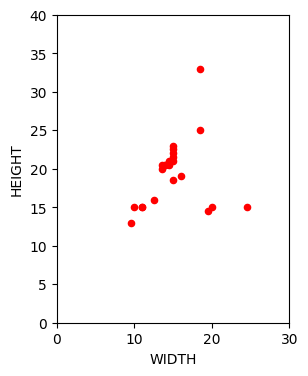

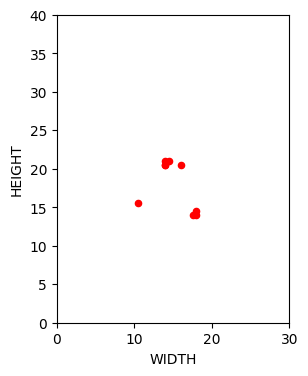

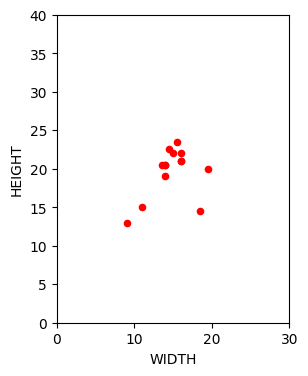

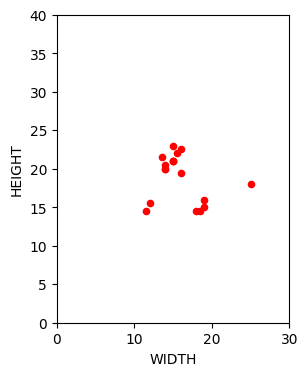

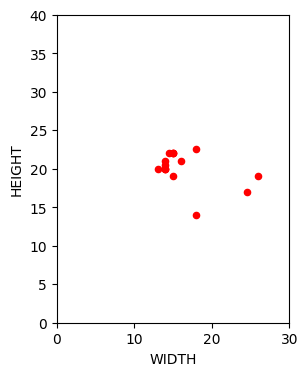

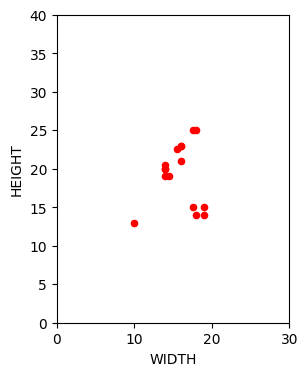

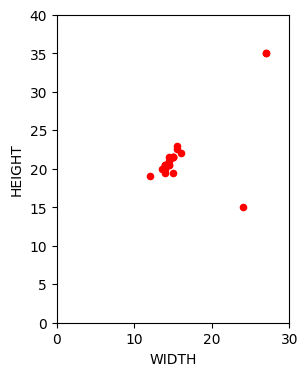

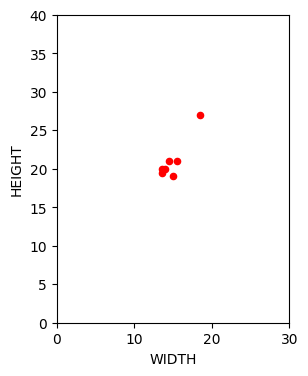

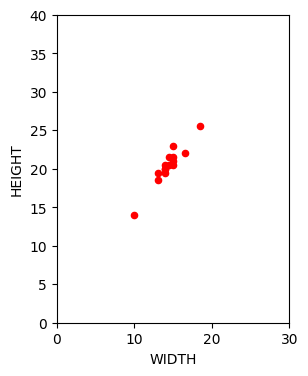

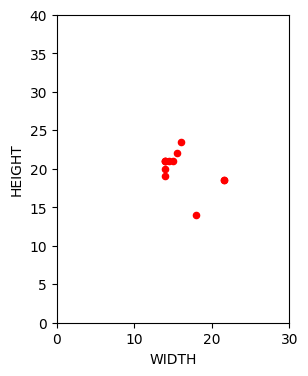

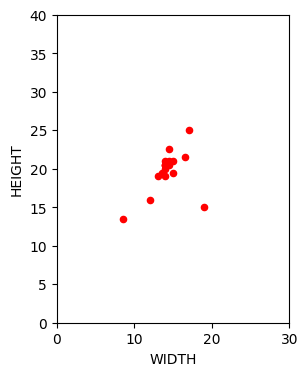

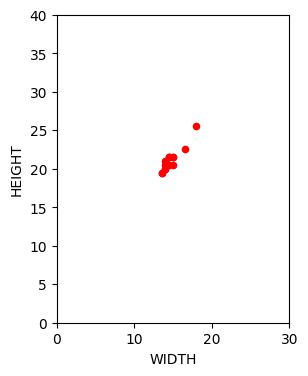

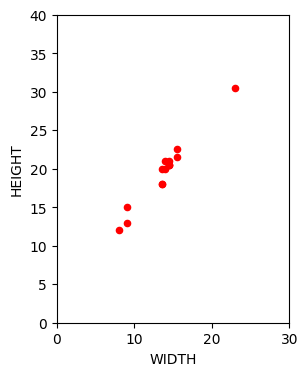

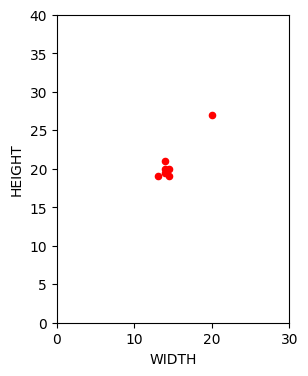

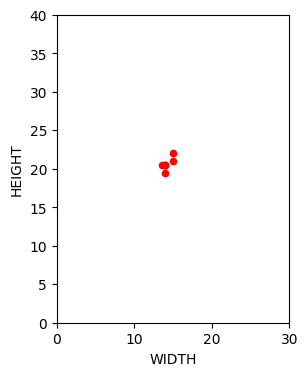

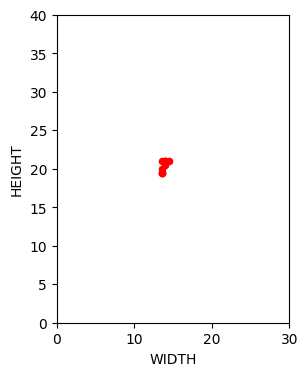

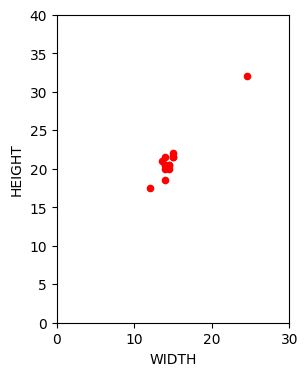

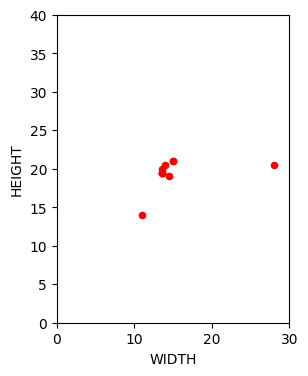

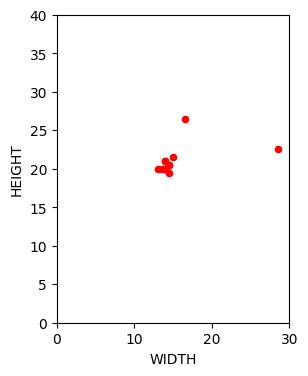

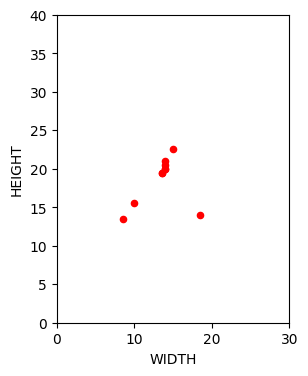

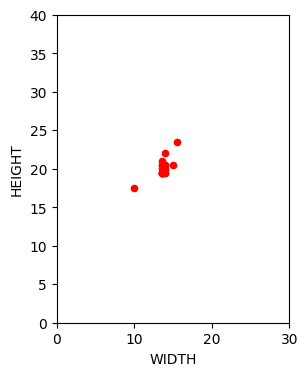

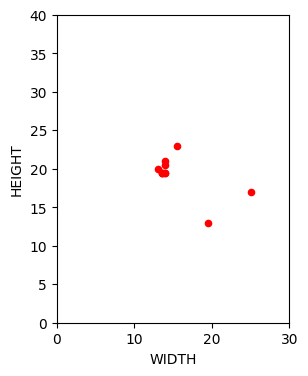

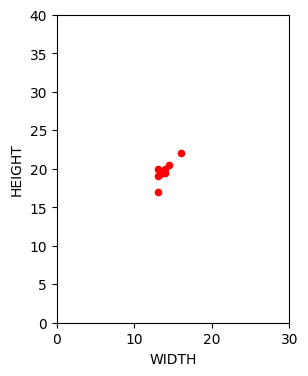

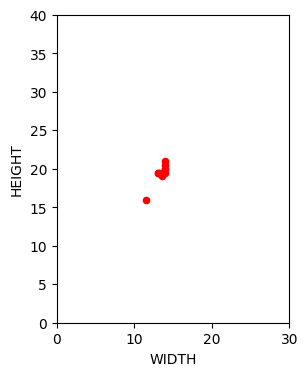

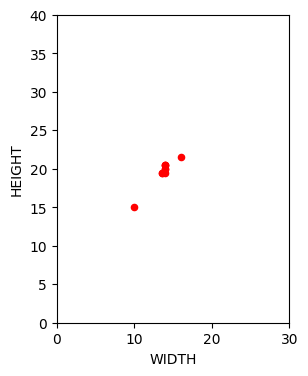

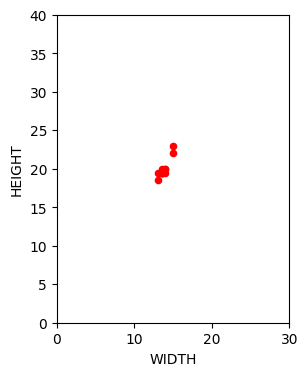

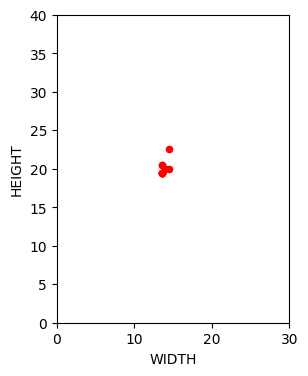

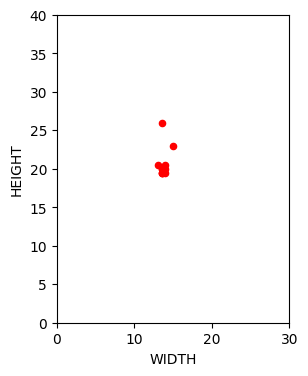

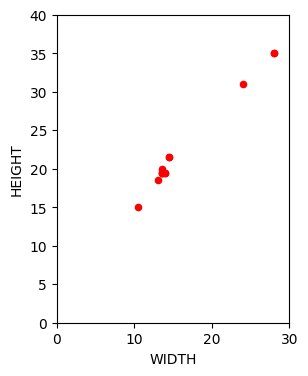

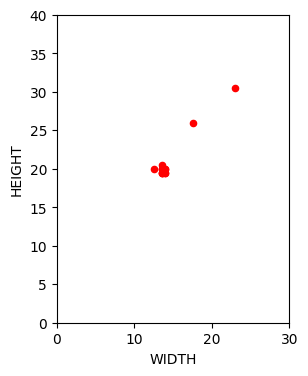

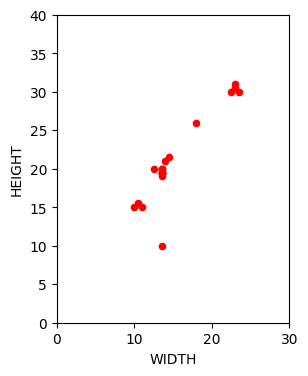

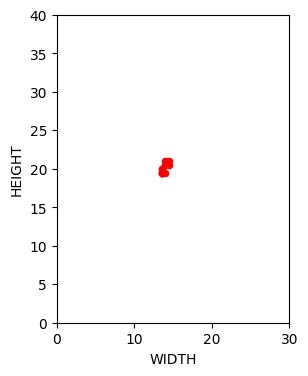

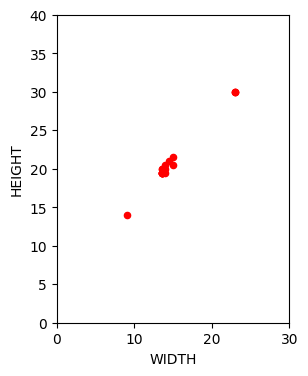

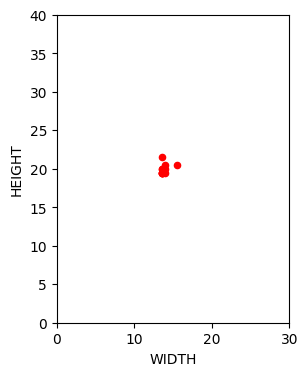

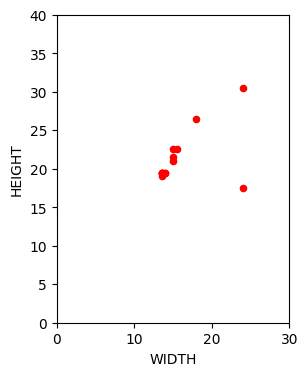

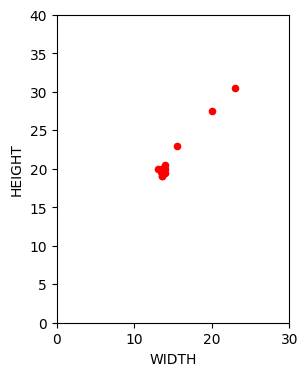

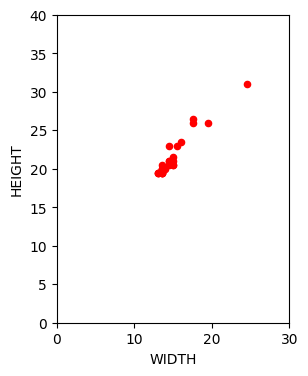

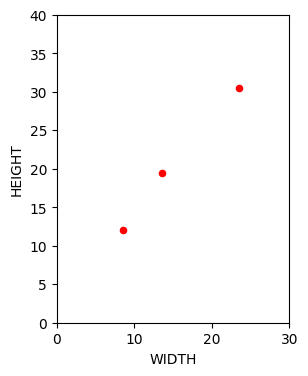

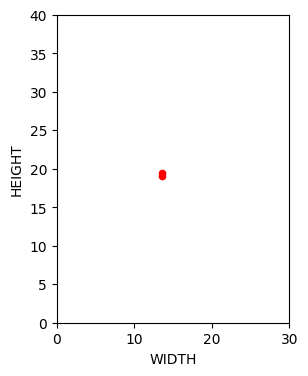

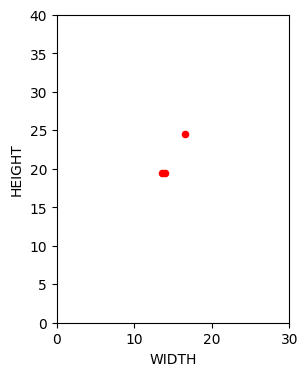

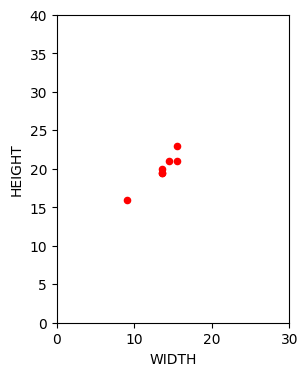

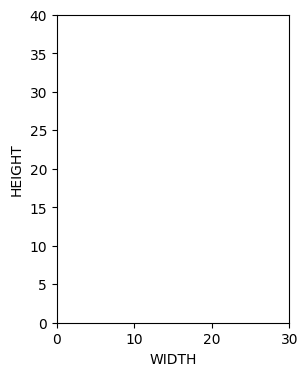

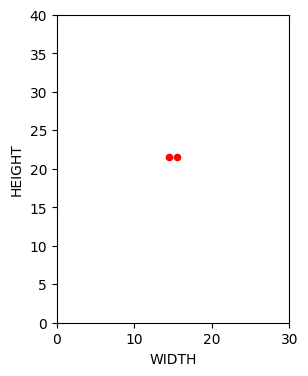

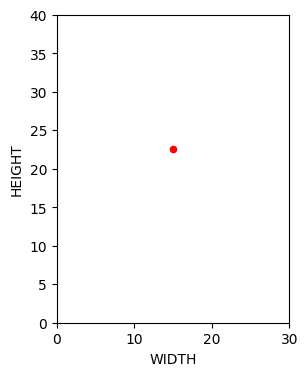

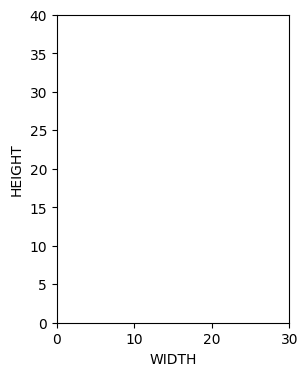

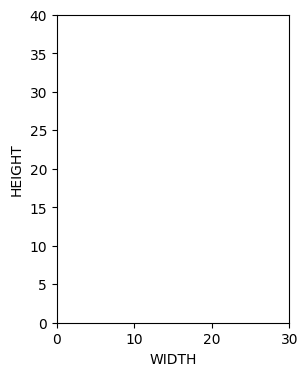

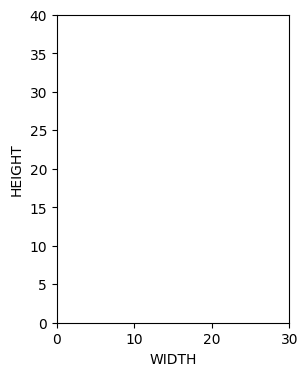

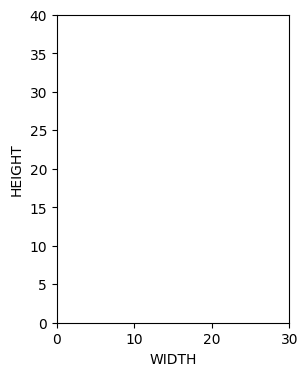

In [ ]:
import imageio.v2 as imageio
import os
start = 1854
end = 1937
jump = 1
duration = 1
for year in range(start, end, jump):
  df[(df["FILENAME ID"]>str(year))&(df["FILENAME ID"]<str(year+jump))].plot(figsize=(3, 4), xlim=(0,30),ylim=(0, 40),kind='scatter',x = 'WIDTH', y = 'HEIGHT', c = 'red').get_figure().savefig("tmp"+str(year)+".png");

with imageio.get_writer('result.gif', mode='I', duration=duration) as writer:
  for year in range(start, end,jump):
    image = imageio.imread("tmp"+str(year)+".png")
    writer.append_data(image)
    os.remove("tmp"+str(year)+".png")


<Figure size 450x600 with 0 Axes>

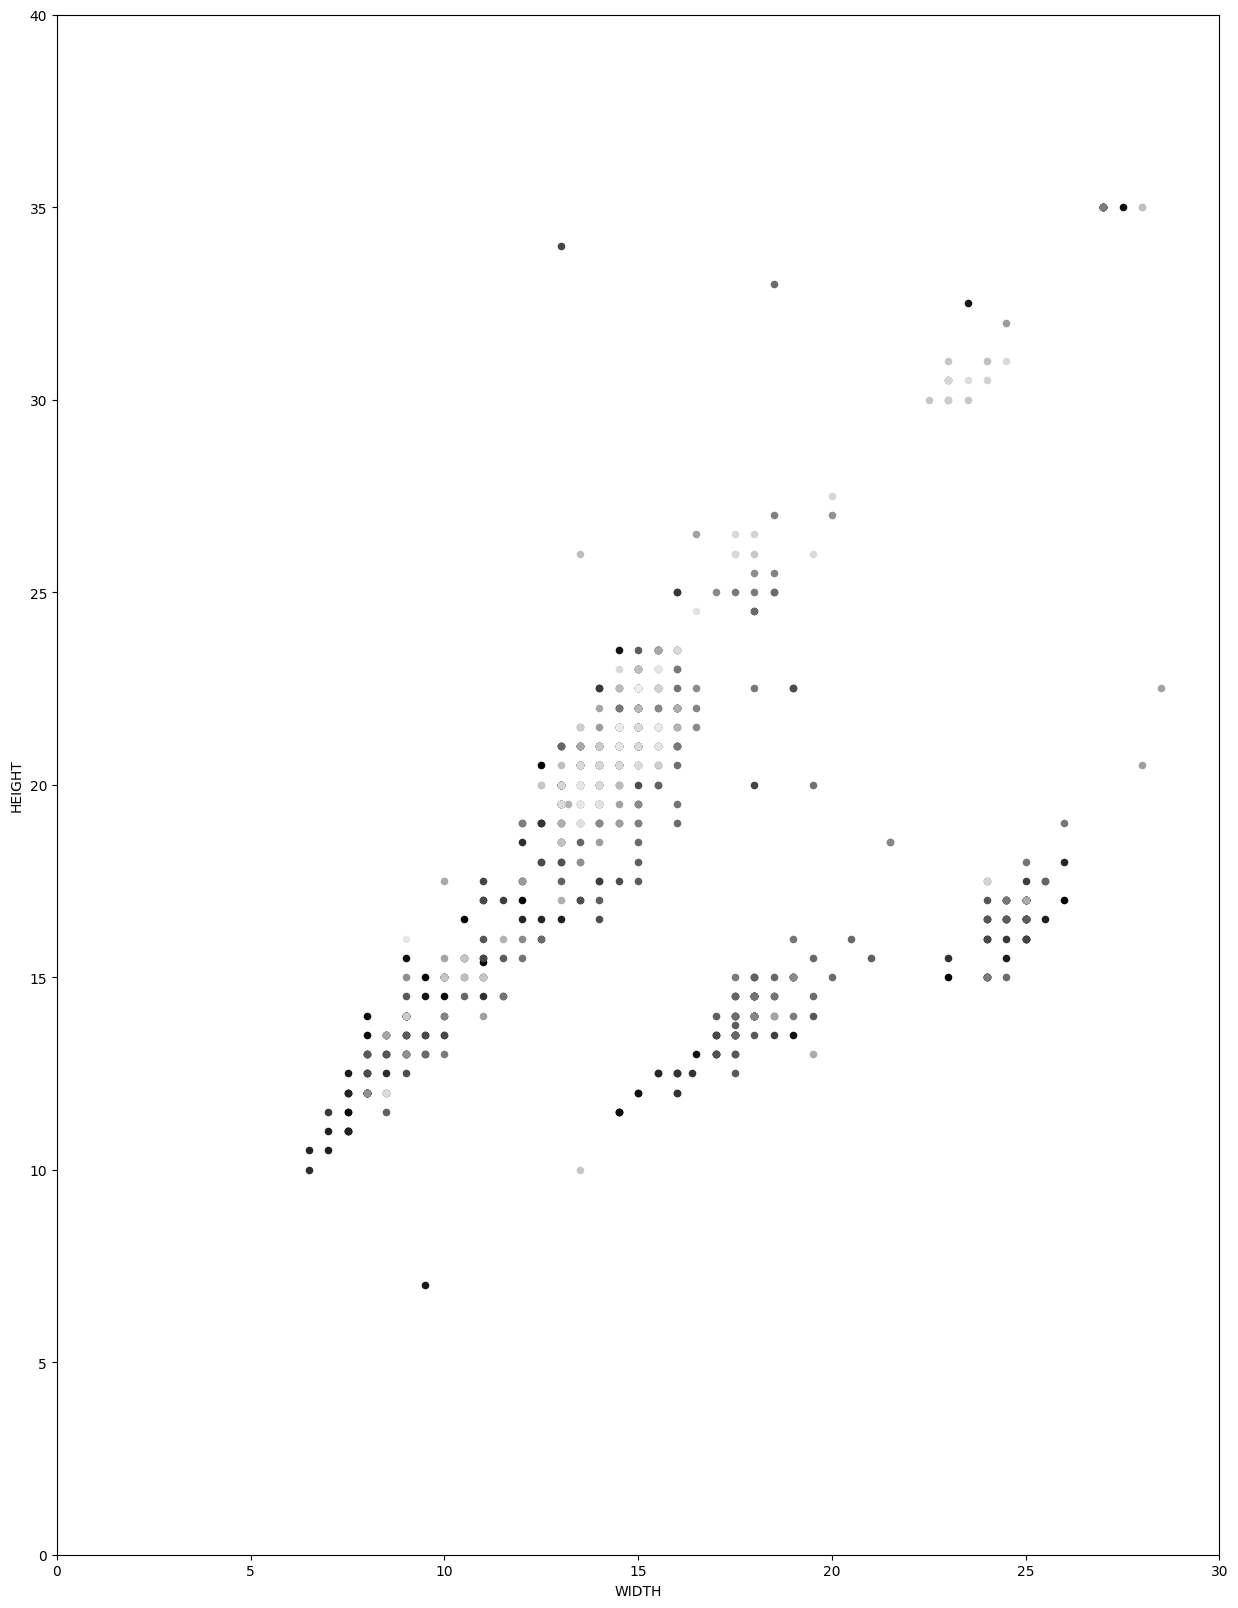

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

start = 1854
end = 1937
jump = 1
duration = 1
rs = 0
gs = 0
bs = 0
re = 255
ge = 255
be = 255
plt.figure(figsize=(3, 4), dpi=150)
fig, ax = plt.subplots()
for year in range(start, end, jump):
  r = hex((int)((year-start)/(end-start)*(re-rs)+rs))[2:]
  if len(r)<2:
    r = '0'+r
  g = hex((int)((year-start)/(end-start)*(ge-gs)+gs))[2:]
  if len(g)<2:
    g = '0'+g
  b = hex((int)((year-start)/(end-start)*(be-bs)+bs))[2:]
  if len(b)<2:
    b = '0'+b
  # print(str(year)+" "+r+" "+g+" "+b)
  df[(df["FILENAME ID"]>str(year))&(df["FILENAME ID"]<str(year+jump))].plot(figsize=(15, 20), xlim=(0,30),ylim=(0, 40),kind='scatter',x = 'WIDTH', y = 'HEIGHT',color='#'+r+g+b,ax=ax)

plt.savefig('width2height.png')

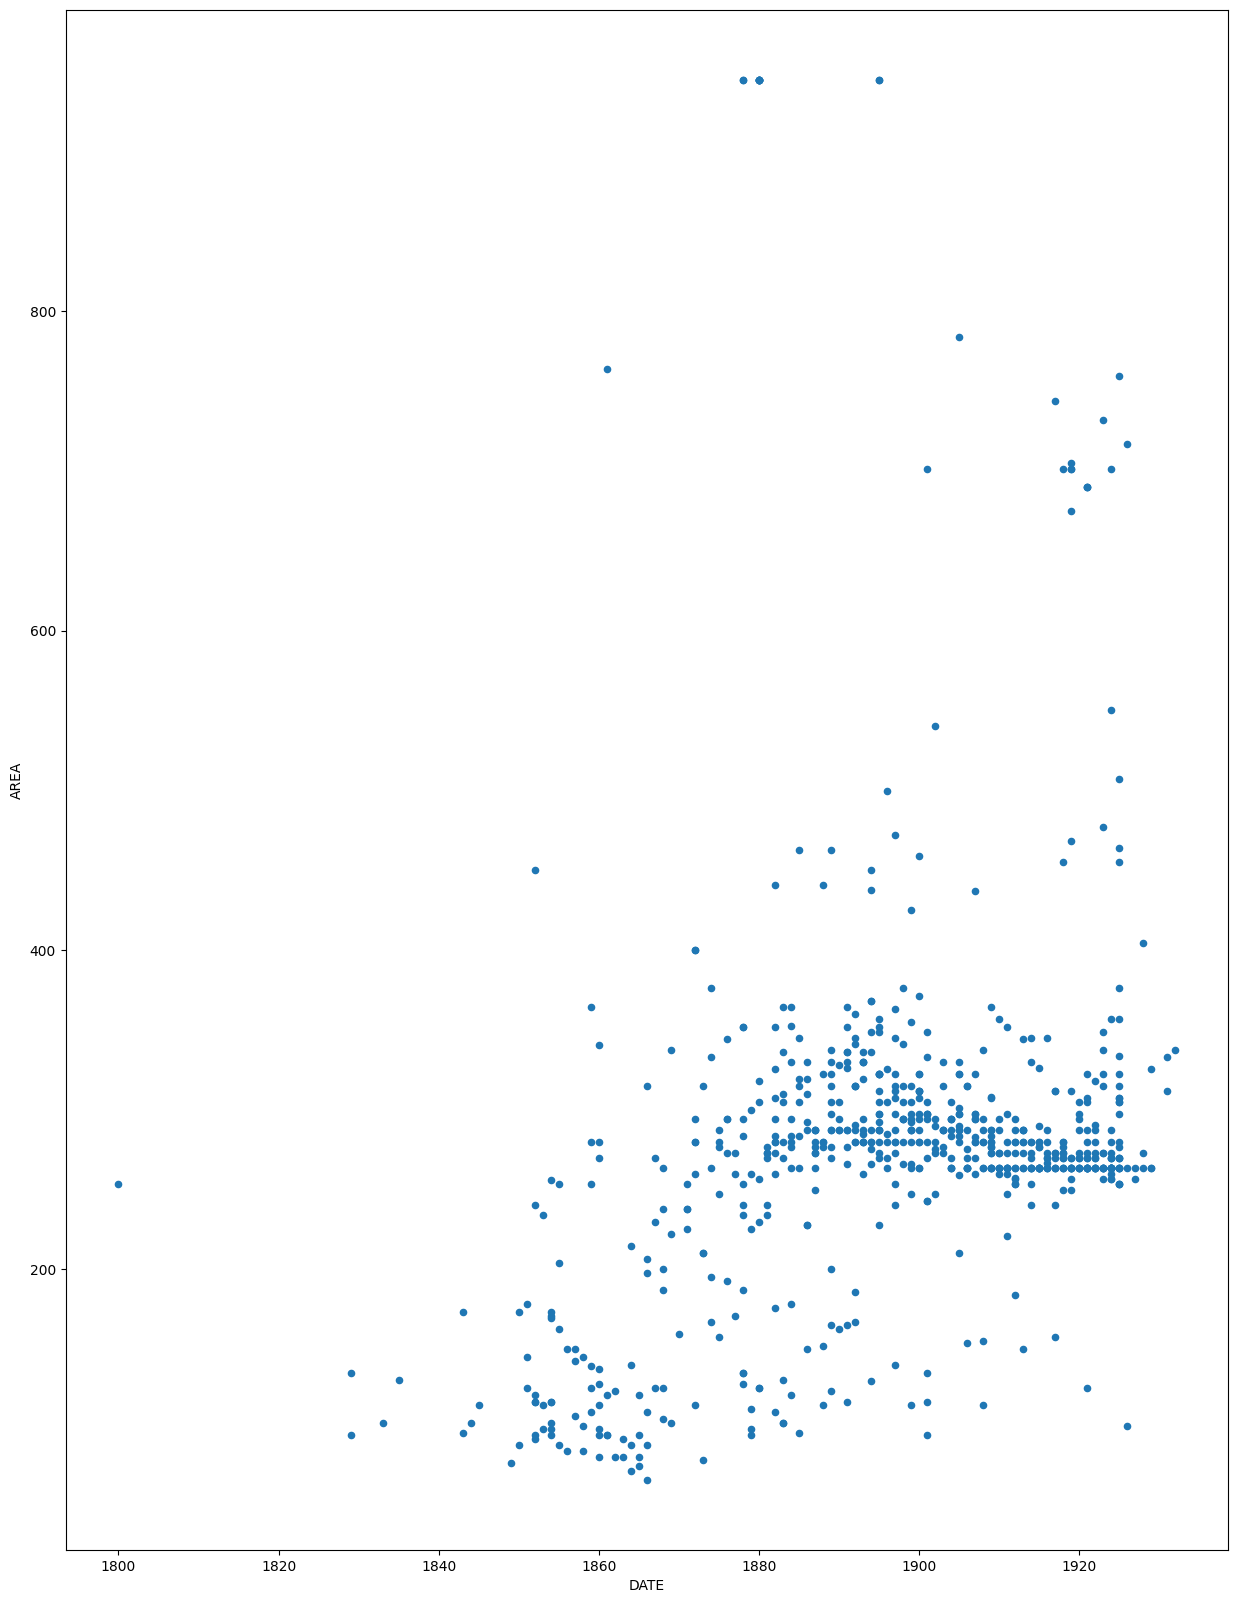

In [ ]:
fig, ax = plt.subplots()

df["RATIO"] = df["HEIGHT"]/df["WIDTH"]
df["AREA"] = df["HEIGHT"]*df["WIDTH"]
for x in df.index:
  if not df.loc[x,"FILENAME ID"][:4].isnumeric():
    continue
  df.loc[x,"DATE"] = int(df.loc[x,"FILENAME ID"][:4])
df[(df["RATIO"]>1.25)&(df["RATIO"]<1.75)].plot(figsize=(15, 20), kind='scatter',x = 'DATE', y = 'AREA',ax=ax)

plt.savefig('date2area.png')

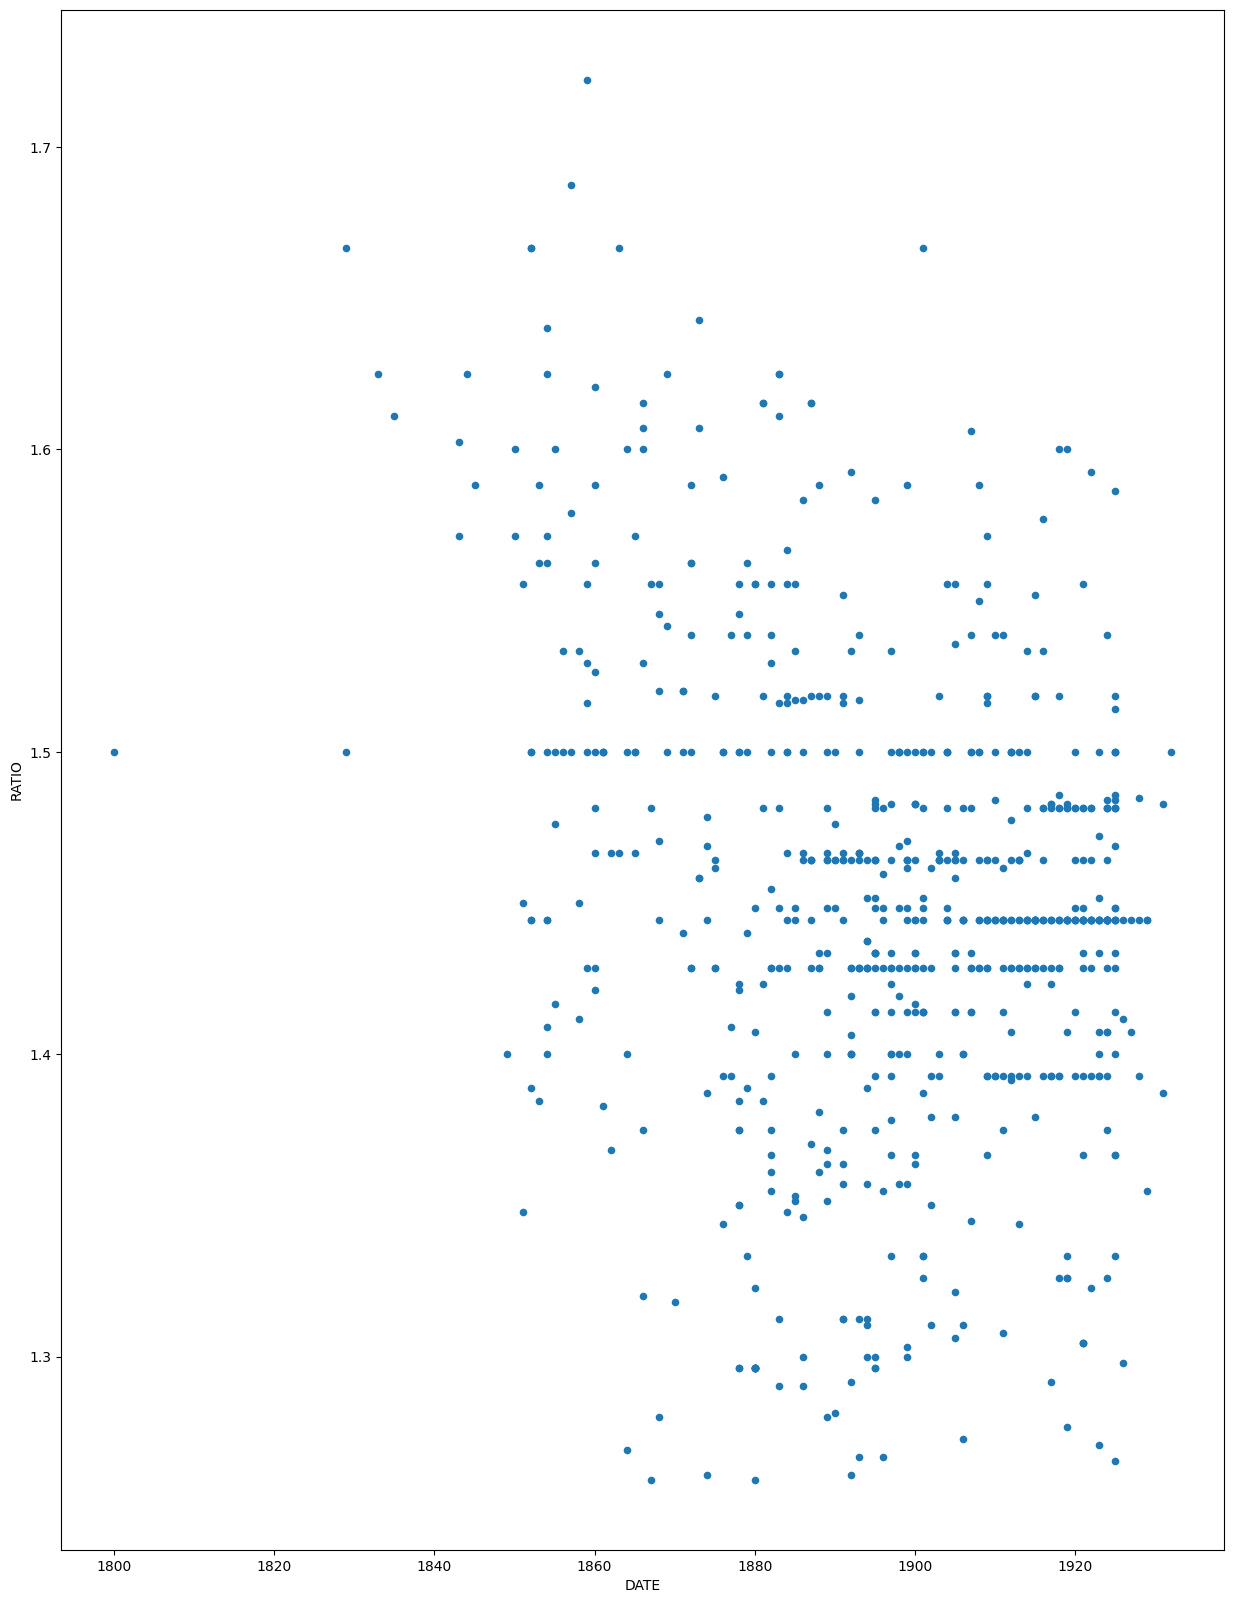

In [ ]:
fig, ax = plt.subplots()
df[(df["RATIO"]>1.25)&(df["RATIO"]<1.75)].plot(figsize=(15, 20), kind='scatter',x = 'DATE', y = 'RATIO',ax=ax)

plt.savefig('date2ratio.png')

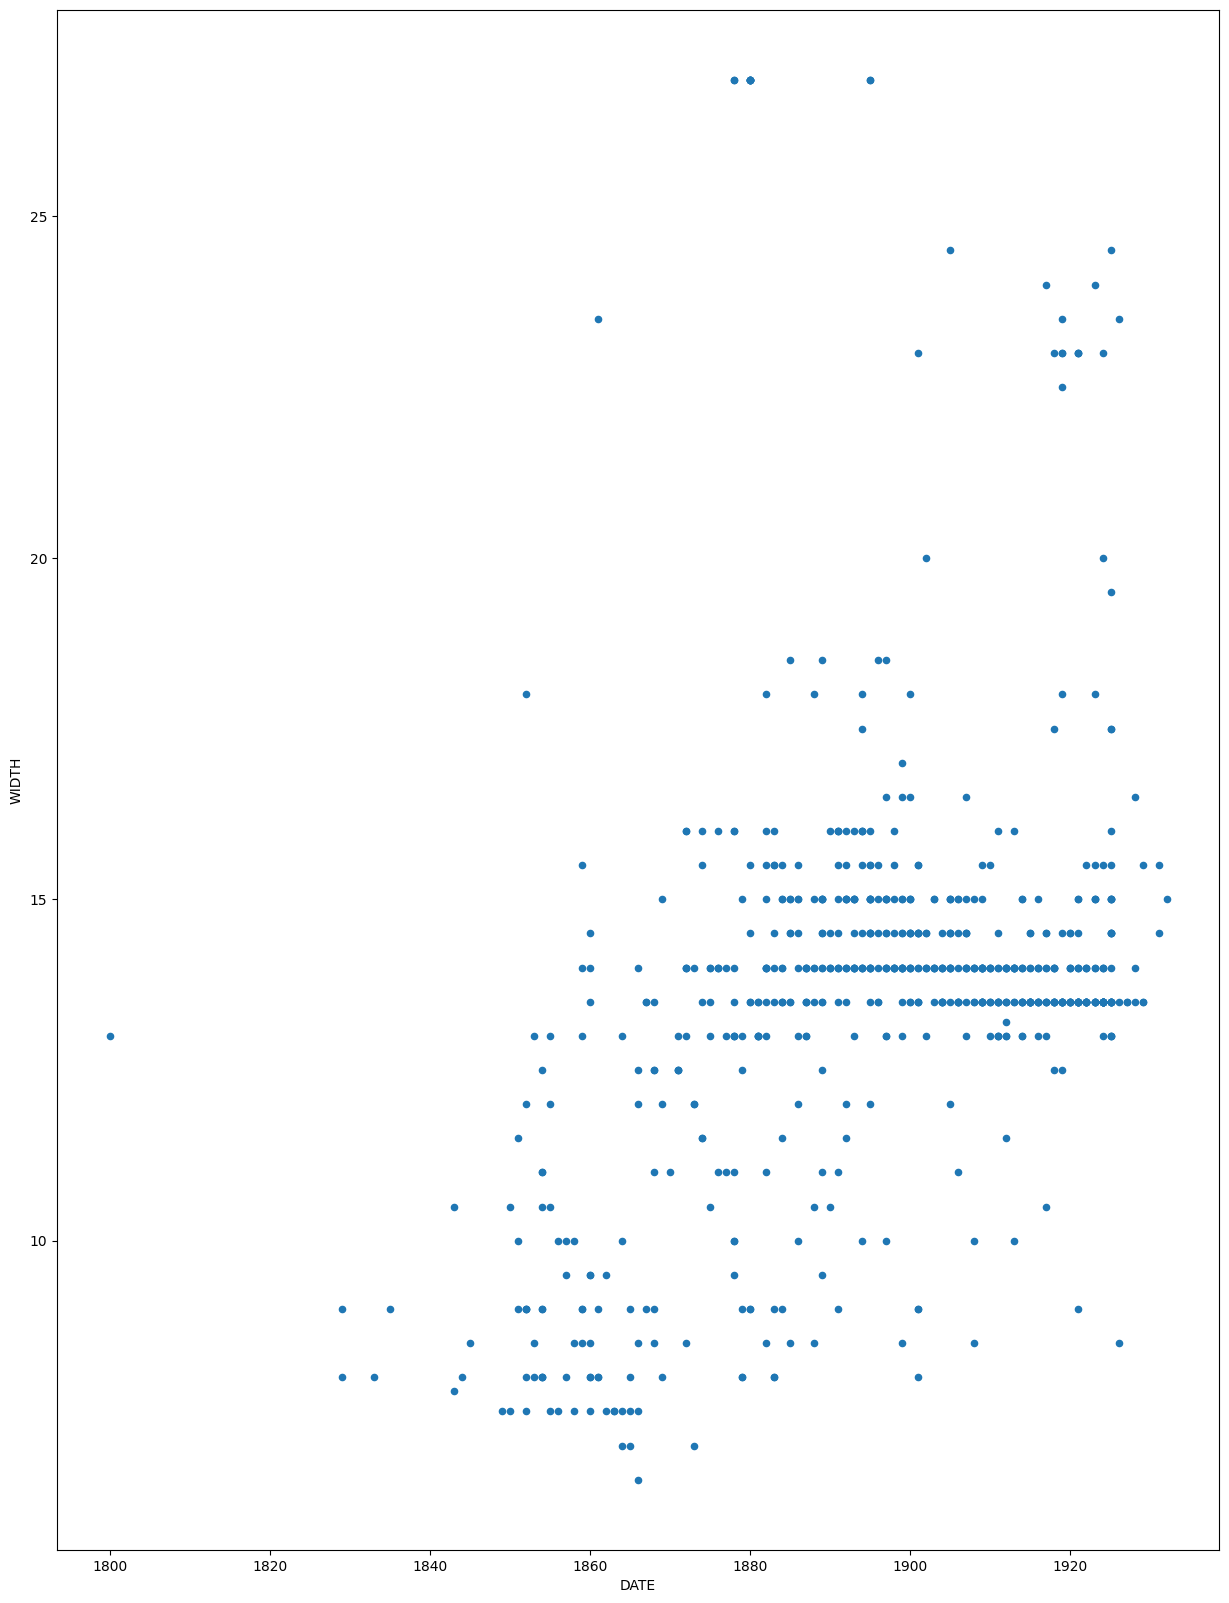

In [ ]:
fig, ax = plt.subplots()
df[(df["RATIO"]>1.25)&(df["RATIO"]<1.75)].plot(figsize=(15, 20), kind='scatter',x = 'DATE', y = 'WIDTH',ax=ax)

plt.savefig('date2width.png')


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Sounding_Spirit/notation.csv')
notation = {} # notation dictionary
notations = [] # list of notations
df2["ssdl:notation"]=df2["ssdl:notation"].astype(str)


for x in df2.index:
  notation[df2.loc[x,"ssdl:pid"]]=df2.loc[x,"ssdl:notation"]
  for s in notation[df2.loc[x,"ssdl:pid"]].split(";"):
    if s.startswith("Seven-shape"):
      s = "Seven-shape"
    if s.startswith("Numeral"):
      s = "Numeral"
    if s not in notations:
      notations.append(s)
for x in df.index:
  if df.loc[x,"FILENAME ID"] in notation:
    df.loc[x,"NOTATION"] = notation[df.loc[x,"FILENAME ID"]]
  else:
    df.drop(x, inplace = True)

notations.remove("nan")
notations.remove("Nil")
print(notations)


['Four-shape', 'Round', 'Seven-shape', 'Numeral', 'Eureka clef', 'Tonic sol-fa']


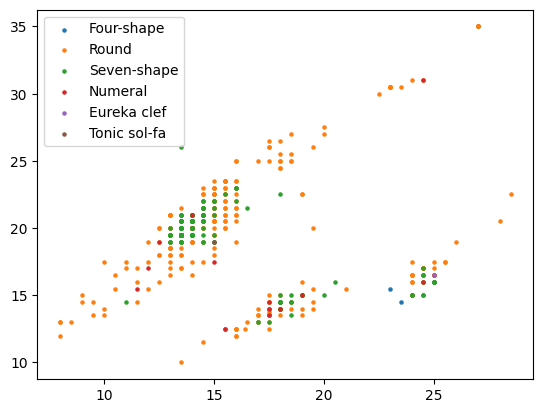

In [ ]:
fig, ax = plt.subplots()
for n in notations:
  ax.scatter(df[df["NOTATION"].str.contains(n)]["WIDTH"],df[df["NOTATION"].str.contains(n)]["HEIGHT"], s=5,label=n)

ax.legend()
plt.show()

group seven and numeral (two)
map all together with different color


define upright with ratio <br/>
divide into two subsets (do one graph for each)<br/>
area vs year

books with a total scoring dimension?<br/>
replace docts with rectangle of size of book<br/>
examples (1 in 20) thumbnail - map?<br/>
try to be interactive<br/>
  search for js object?<br/>
